In [92]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

data = {}

In [3]:
for files in data_files:
    data_frame = pd.read_csv(r"C:\Users\hrap003\Downloads\{}".format(files))
    keys = files.replace(".csv", "")
    data[keys] = data_frame

In [4]:
data["ap_2010"].columns

Index(['DBN', 'SchoolName', 'AP Test Takers ', 'Total Exams Taken',
       'Number of Exams with scores 3 4 or 5'],
      dtype='object')

In [5]:
data["class_size"].columns

Index(['CSD', 'BOROUGH', 'SCHOOL CODE', 'SCHOOL NAME', 'GRADE ',
       'PROGRAM TYPE', 'CORE SUBJECT (MS CORE and 9-12 ONLY)',
       'CORE COURSE (MS CORE and 9-12 ONLY)', 'SERVICE CATEGORY(K-9* ONLY)',
       'NUMBER OF STUDENTS / SEATS FILLED', 'NUMBER OF SECTIONS',
       'AVERAGE CLASS SIZE', 'SIZE OF SMALLEST CLASS', 'SIZE OF LARGEST CLASS',
       'DATA SOURCE', 'SCHOOLWIDE PUPIL-TEACHER RATIO'],
      dtype='object')

In [6]:
data["demographics"].columns

Index(['DBN', 'Name', 'schoolyear', 'fl_percent', 'frl_percent',
       'total_enrollment', 'prek', 'k', 'grade1', 'grade2', 'grade3', 'grade4',
       'grade5', 'grade6', 'grade7', 'grade8', 'grade9', 'grade10', 'grade11',
       'grade12', 'ell_num', 'ell_percent', 'sped_num', 'sped_percent',
       'ctt_num', 'selfcontained_num', 'asian_num', 'asian_per', 'black_num',
       'black_per', 'hispanic_num', 'hispanic_per', 'white_num', 'white_per',
       'male_num', 'male_per', 'female_num', 'female_per'],
      dtype='object')

In [7]:
data["graduation"].columns

Index(['Demographic', 'DBN', 'School Name', 'Cohort', 'Total Cohort',
       'Total Grads - n', 'Total Grads - % of cohort', 'Total Regents - n',
       'Total Regents - % of cohort', 'Total Regents - % of grads',
       'Advanced Regents - n', 'Advanced Regents - % of cohort',
       'Advanced Regents - % of grads', 'Regents w/o Advanced - n',
       'Regents w/o Advanced - % of cohort',
       'Regents w/o Advanced - % of grads', 'Local - n', 'Local - % of cohort',
       'Local - % of grads', 'Still Enrolled - n',
       'Still Enrolled - % of cohort', 'Dropped Out - n',
       'Dropped Out - % of cohort'],
      dtype='object')

In [8]:
data["hs_directory"].columns

Index(['dbn', 'school_name', 'borough', 'building_code', 'phone_number',
       'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min',
       'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city',
       'state_code', 'postcode', 'website', 'total_students', 'campus_name',
       'school_type', 'overview_paragraph', 'program_highlights',
       'language_classes', 'advancedplacement_courses', 'online_ap_courses',
       'online_language_courses', 'extracurricular_activities',
       'psal_sports_boys', 'psal_sports_girls', 'psal_sports_coed',
       'school_sports', 'partner_cbo', 'partner_hospital', 'partner_highered',
       'partner_cultural', 'partner_nonprofit', 'partner_corporate',
       'partner_financial', 'partner_other', 'addtl_info1', 'addtl_info2',
       'start_time', 'end_time', 'se_services', 'ell_programs',
       'school_accessibility_description', 'number_programs', 'priority01',
       'priority02', 'priority03', 'priority04', 'prior

In [9]:
data["sat_results"].columns

Index(['DBN', 'SCHOOL NAME', 'Num of SAT Test Takers',
       'SAT Critical Reading Avg. Score', 'SAT Math Avg. Score',
       'SAT Writing Avg. Score'],
      dtype='object')

In [10]:
print(data["sat_results"].head())

      DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   
3  01M458                      FORSYTH SATELLITE ACADEMY   
4  01M509                        MARTA VALLE HIGH SCHOOL   

  Num of SAT Test Takers SAT Critical Reading Avg. Score SAT Math Avg. Score  \
0                     29                             355                 404   
1                     91                             383                 423   
2                     70                             377                 402   
3                      7                             414                 401   
4                     44                             390                 433   

  SAT Writing Avg. Score  
0                    363  
1                    366  
2                    370  
3                    359  
4                    38

In [11]:
all_survey = pd.read_csv(r"C:\Users\hrap003\Downloads\masterfile11_gened_final.txt", delimiter="\t", encoding="windows-1252")

In [12]:
all_survey[:2]

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,...,s_N_q14e_3,s_N_q14e_4,s_N_q14f_1,s_N_q14f_2,s_N_q14f_3,s_N_q14f_4,s_N_q14g_1,s_N_q14g_2,s_N_q14g_3,s_N_q14g_4
0,01M015,M015,P.S. 015 Roberto Clemente,0,No,0.0,Elementary School,NaN,88,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M019,M019,P.S. 019 Asher Levy,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
d75_survey = pd.read_csv(r"C:\Users\hrap003\Downloads\masterfile11_d75_final.txt", delimiter="\t", encoding="windows-1252")

In [14]:
d75_survey[:2]

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,...,s_q14_2,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11
0,75K004,K004,P.S. K004,1,Yes,0.0,District 75 Special Education,38.0,90,72,...,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,75K036,K036,P.S. 36,1,Yes,NaN,District 75 Special Education,70.0,69,44,...,20.0,27.0,19.0,9.0,2.0,6.0,1.0,2.0,0.0,0.0


In [15]:
survey = pd.concat([all_survey, d75_survey], axis = 0)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [16]:
survey[:2]

,N_p,N_s,N_t,aca_p_11,aca_s_11,aca_t_11,aca_tot_11,bn,com_p_11,com_s_11,...,t_q8c_1,t_q8c_2,t_q8c_3,t_q8c_4,t_q9,t_q9_1,t_q9_2,t_q9_3,t_q9_4,t_q9_5
0,90.0,NaN,22.0,7.8,NaN,7.9,7.9,M015,7.6,NaN,...,29.0,67.0,5.0,0.0,NaN,5.0,14.0,52.0,24.0,5.0
1,161.0,NaN,34.0,7.8,NaN,9.1,8.4,M019,7.6,NaN,...,74.0,21.0,6.0,0.0,NaN,3.0,6.0,3.0,78.0,9.0


In [17]:
all_survey.shape

(1646, 1942)

In [18]:
d75_survey.shape

(56, 1773)

In [19]:
survey.shape

(1702, 2773)

In [20]:
survey["DBN"] = survey["dbn"]

In [21]:
survey.shape

(1702, 2774)

In [22]:
survey = survey[["DBN", "rr_s", "rr_t", "rr_p", "N_s", 
 "N_t", "N_p", "saf_p_11", "com_p_11", 
 "eng_p_11", "aca_p_11", "saf_t_11", 
 "com_t_11", "eng_t_11", "aca_t_11", 
 "saf_s_11", "com_s_11", "eng_s_11", 
 "aca_s_11", "saf_tot_11", "com_tot_11", 
 "eng_tot_11", "aca_tot_11"]]

In [23]:
survey.shape

(1702, 23)

In [24]:
data["survey"]= survey

In [25]:
data["hs_directory"]["DBN"]= data["hs_directory"]["dbn"]

In [26]:
data["hs_directory"].columns

Index(['dbn', 'school_name', 'borough', 'building_code', 'phone_number',
       'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min',
       'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city',
       'state_code', 'postcode', 'website', 'total_students', 'campus_name',
       'school_type', 'overview_paragraph', 'program_highlights',
       'language_classes', 'advancedplacement_courses', 'online_ap_courses',
       'online_language_courses', 'extracurricular_activities',
       'psal_sports_boys', 'psal_sports_girls', 'psal_sports_coed',
       'school_sports', 'partner_cbo', 'partner_hospital', 'partner_highered',
       'partner_cultural', 'partner_nonprofit', 'partner_corporate',
       'partner_financial', 'partner_other', 'addtl_info1', 'addtl_info2',
       'start_time', 'end_time', 'se_services', 'ell_programs',
       'school_accessibility_description', 'number_programs', 'priority01',
       'priority02', 'priority03', 'priority04', 'prior

In [27]:
def convert_csd(column):
    column = str(column)
    if len(column) == 2:
        return column
    if len(column) < 2:
        return column.zfill(2)
    
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(convert_csd)

In [28]:
data["class_size"].columns

Index(['CSD', 'BOROUGH', 'SCHOOL CODE', 'SCHOOL NAME', 'GRADE ',
       'PROGRAM TYPE', 'CORE SUBJECT (MS CORE and 9-12 ONLY)',
       'CORE COURSE (MS CORE and 9-12 ONLY)', 'SERVICE CATEGORY(K-9* ONLY)',
       'NUMBER OF STUDENTS / SEATS FILLED', 'NUMBER OF SECTIONS',
       'AVERAGE CLASS SIZE', 'SIZE OF SMALLEST CLASS', 'SIZE OF LARGEST CLASS',
       'DATA SOURCE', 'SCHOOLWIDE PUPIL-TEACHER RATIO', 'padded_csd'],
      dtype='object')

In [29]:
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]

In [30]:
data["class_size"].head(1)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015


In [31]:
data["sat_results"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
DBN                                478 non-null object
SCHOOL NAME                        478 non-null object
Num of SAT Test Takers             478 non-null object
SAT Critical Reading Avg. Score    478 non-null object
SAT Math Avg. Score                478 non-null object
SAT Writing Avg. Score             478 non-null object
dtypes: object(6)
memory usage: 22.5+ KB


In [32]:
data["sat_results"]["SAT Math Avg. Score"] = pd.to_numeric(data["sat_results"]["SAT Math Avg. Score"], errors="coerce")

In [33]:
data["sat_results"]["SAT Critical Reading Avg. Score"] = pd.to_numeric(data["sat_results"]["SAT Critical Reading Avg. Score"], errors="coerce")

In [34]:
data["sat_results"]["SAT Writing Avg. Score"] = pd.to_numeric(data["sat_results"]["SAT Writing Avg. Score"], errors="coerce")

In [35]:
data["sat_results"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
DBN                                478 non-null object
SCHOOL NAME                        478 non-null object
Num of SAT Test Takers             478 non-null object
SAT Critical Reading Avg. Score    421 non-null float64
SAT Math Avg. Score                421 non-null float64
SAT Writing Avg. Score             421 non-null float64
dtypes: float64(3), object(3)
memory usage: 22.5+ KB


In [36]:
data["sat_results"]["sat_score"] = data["sat_results"]["SAT Critical Reading Avg. Score"] + data["sat_results"]["SAT Math Avg. Score"] + data["sat_results"]["SAT Writing Avg. Score"]

In [37]:
data["sat_results"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 7 columns):
DBN                                478 non-null object
SCHOOL NAME                        478 non-null object
Num of SAT Test Takers             478 non-null object
SAT Critical Reading Avg. Score    421 non-null float64
SAT Math Avg. Score                421 non-null float64
SAT Writing Avg. Score             421 non-null float64
sat_score                          421 non-null float64
dtypes: float64(4), object(3)
memory usage: 26.2+ KB


In [38]:
data["sat_results"].head(1)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0


In [39]:
data["sat_results"]["sat_score"].head(5)

0    1122.0
1    1172.0
2    1149.0
3    1174.0
4    1207.0
Name: sat_score, dtype: float64

In [40]:
data["hs_directory"].head(1)

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority09,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,DBN
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9.0,12,NaN,NaN,...,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...",9.0,35.0,213,"3,029,686","3,011,870,001",Crown Heights South ...,17K548


In [41]:
def convert_lat(lat_column):
    coords = re.findall("\(.+\)", lat_column)
    lat = coords[0].split(",")[0].replace("(", "")
    return lat

data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(convert_lat)

In [42]:
data["hs_directory"].head(2)

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,DBN,lat
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9.0,12,NaN,NaN,...,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...",9.0,35.0,213,"3,029,686","3,011,870,001",Crown Heights South ...,17K548,40.67029890700047
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9.0,12,NaN,NaN,...,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026...",3.0,16.0,135,"2,004,526","2,026,340,001",Morrisania-Melrose ...,09X543,40.8276026690005


In [43]:
exp = data["hs_directory"]

In [44]:
def convert_lon(long_column):
    coords = re.findall("\(.+\)", long_column)
    long = coords[0].split(",")[1].replace(")", "")
    return long
    
data["hs_directory"]["lon"] = data["hs_directory"]["Location 1"].apply(convert_lon)

In [45]:
data["hs_directory"].head(2)

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,DBN,lat,lon
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9.0,12,NaN,NaN,...,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...",9.0,35.0,213,"3,029,686","3,011,870,001",Crown Heights South ...,17K548,40.67029890700047,-73.96164787599963
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9.0,12,NaN,NaN,...,"1110 Boston Road\nBronx, NY 10456\n(40.8276026...",3.0,16.0,135,"2,004,526","2,026,340,001",Morrisania-Melrose ...,09X543,40.8276026690005,-73.90447525699966


In [46]:
data["hs_directory"]["lat"] = pd.to_numeric(data["hs_directory"]["lat"], errors="coerce")

In [47]:
data["hs_directory"]["lon"] = pd.to_numeric(data["hs_directory"]["lon"], errors="coerce")

In [48]:
data["class_size"]["GRADE "].unique()

array(['0K', '01', '02', '03', '04', '05', '0K-09', nan, '06', '07', '08',
       'MS Core', '09-12', '09'], dtype=object)

In [49]:
class_size = data["class_size"]

In [50]:
class_size = class_size[class_size["GRADE "]== "09-12"]

In [51]:
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]

In [52]:
class_size.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6513 entries, 225 to 27608
Data columns (total 18 columns):
CSD                                     6513 non-null int64
BOROUGH                                 6513 non-null object
SCHOOL CODE                             6513 non-null object
SCHOOL NAME                             6513 non-null object
GRADE                                   6513 non-null object
PROGRAM TYPE                            6513 non-null object
CORE SUBJECT (MS CORE and 9-12 ONLY)    6513 non-null object
CORE COURSE (MS CORE and 9-12 ONLY)     6513 non-null object
SERVICE CATEGORY(K-9* ONLY)             6513 non-null object
NUMBER OF STUDENTS / SEATS FILLED       6513 non-null object
NUMBER OF SECTIONS                      6513 non-null float64
AVERAGE CLASS SIZE                      6513 non-null float64
SIZE OF SMALLEST CLASS                  6513 non-null float64
SIZE OF LARGEST CLASS                   6513 non-null float64
DATA SOURCE                      

In [53]:
class_size["CORE SUBJECT (MS CORE and 9-12 ONLY)"].unique()

array(['ENGLISH', 'MATH', 'SCIENCE', 'SOCIAL STUDIES'], dtype=object)

In [54]:
class_size["CORE COURSE (MS CORE and 9-12 ONLY)"].unique()

array(['English 9', 'English 10', 'English 11', 'English 12',
       'Integrated Algebra', 'Geometry', 'Other Math', 'Earth Science',
       'Living Environment', 'Chemistry', 'Physics', 'Other Science',
       'Global History & Geography', 'US History & Government',
       'MS English Core', 'Other English', 'Trigonometry',
       'Participation in Government', 'Math A', 'Economics',
       'Other Social Studies', 'Math B'], dtype=object)

In [55]:
class_size = class_size.groupby("DBN").agg(np.mean)
class_size.reset_index(inplace=True)
data["class_size"] = class_size
data["class_size"].head()

,DBN,CSD,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,1,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,1,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,1,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,1,2.733333,21.200000,19.40,22.866667,NaN


In [56]:
demographics = data["demographics"]

In [57]:
demographics = demographics[demographics["schoolyear"]==20112012]

In [58]:
data["demographics"] = demographics

In [59]:
graduation = data["graduation"]

In [60]:
graduation = graduation[graduation["Cohort"]=="2006"]

In [61]:
graduation = graduation[graduation["Demographic"]== "Total Cohort"]

In [62]:
data["graduation"] = graduation

In [63]:
ap_columns = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

In [64]:
for columns in ap_columns:
    data["ap_2010"][columns] = pd.to_numeric(data["ap_2010"][columns], errors="coerce")

In [65]:
data["ap_2010"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 5 columns):
DBN                                     258 non-null object
SchoolName                              258 non-null object
AP Test Takers                          230 non-null float64
Total Exams Taken                       225 non-null float64
Number of Exams with scores 3 4 or 5    148 non-null float64
dtypes: float64(3), object(2)
memory usage: 10.2+ KB


In [66]:
combined = data["sat_results"]

In [68]:
combined = combined.merge(data["ap_2010"], left_on = "DBN", right_on = "DBN", how = "left")

In [70]:
combined = combined.merge(data["graduation"], left_on = "DBN", right_on = "DBN", how = "left")

In [72]:
combined.shape

(479, 33)

In [73]:
combined = combined.merge(data["class_size"], left_on = "DBN", right_on = "DBN", how = "inner")

In [74]:
combined = combined.merge(data["demographics"], left_on = "DBN", right_on = "DBN", how = "inner")

In [75]:
combined = combined.merge(data["survey"], left_on = "DBN", right_on = "DBN", how = "inner")

In [76]:
combined = combined.merge(data["hs_directory"], left_on = "DBN", right_on = "DBN", how = "inner")

In [77]:
combined.shape

(363, 164)

In [81]:
combined = combined.fillna(combined.mean(axis = 0))
combined = combined.fillna(0)
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,107.419512,131.425,...,0,"220 Henry Street\nNew York, NY 10002\n(40.7137...",3.0,1.0,201,"1,003,223","1,002,690,041",Lower East Side ...,40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000,...,0,"200 Monroe Street\nNew York, NY 10002\n(40.712...",3.0,1.0,202,"1,003,214","1,002,590,044",Lower East Side ...,40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000,...,0,"420 East 12 Street\nNew York, NY 10009\n(40.72...",3.0,2.0,34,"1,005,974","1,004,390,017",East Village ...,40.729783,-73.983041
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,0,107.419512,131.425,...,0,"145 Stanton Street\nNew York, NY 10002\n(40.72...",3.0,1.0,"3,001","1,004,323","1,003,540,080",Chinatown ...,40.720569,-73.985673
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.000000,377.000,...,0,"111 Columbia Street\nNew York, NY 10002\n(40.7...",3.0,2.0,"2,201","1,004,070","1,003,350,001",Lower East Side ...,40.718725,-73.979426


In [82]:
exp = combined

In [86]:
def extract(column):
    for col in column:
        new_column = column[:2]
    return new_column
    
combined["school_dist"] = combined["DBN"].apply(extract)

In [87]:
combined.head(1)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon,school_dist
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,107.419512,131.425,...,"220 Henry Street\nNew York, NY 10002\n(40.7137...",3.0,1.0,201,"1,003,223","1,002,690,041",Lower East Side ...,40.713764,-73.98526,01


In [89]:
correlations = combined.corr(method='pearson')

In [91]:
correlations["sat_score"]

SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
SAT Writing Avg. Score                  0.987771
sat_score                               1.000000
AP Test Takers                          0.412667
Total Exams Taken                       0.388975
Number of Exams with scores 3 4 or 5    0.382931
CSD                                     0.042948
NUMBER OF SECTIONS                      0.362673
AVERAGE CLASS SIZE                      0.381014
SIZE OF SMALLEST CLASS                  0.249949
SIZE OF LARGEST CLASS                   0.314434
SCHOOLWIDE PUPIL-TEACHER RATIO               NaN
schoolyear                                   NaN
fl_percent                                   NaN
frl_percent                            -0.722225
total_enrollment                        0.367857
ell_num                                -0.153778
ell_percent                            -0.398750
sped_num                                0.034933
sped_percent        

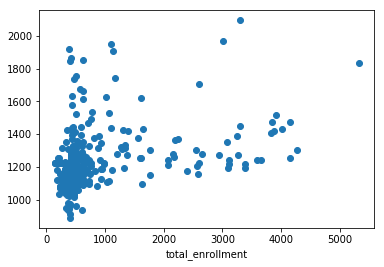

In [94]:
plt.scatter(combined["total_enrollment"], combined["sat_score"])
plt.xlabel("total_enrollment")
plt.ylabel("sat_score")
plt.show()